In [0]:
# Code based on R code, available at:
# https://github.com/icaroagostino/fun/blob/master/Monty_Hall.R

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

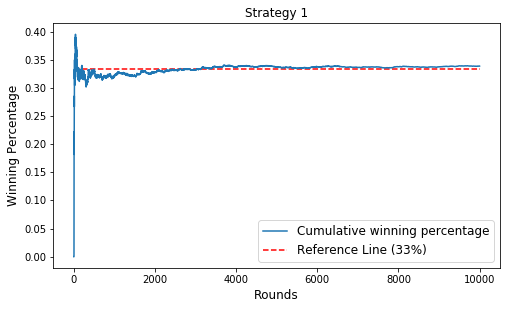

In [19]:
# Illustration of Monty Hall problem

n = 10000 # number of repetitions
victories = [] # vector of victories of strategy 1
doors = np.array([1,2,3]) # vector of doors

#####################################
# Strategy 1 - Dont change the door #
#####################################

for i in range(n):
  
  # np.random.seed(1234)
  prize_door = np.random.choice(doors,1) # door with the prize
  
  # np.random.seed(1234)
  choice = np.random.choice(doors,1) # player's choice

  # if the choice is equal to the the prize door, win [1]
  if prize_door == choice:
    victories[n:n] = [1]
  # if the choice is different from the the prize door, lose [0]
  else:
    victories[n:n] = [0]

# Compute results

rounds = np.array(range(1,n+1,1))
win_perc = np.cumsum(victories)/rounds 

data = pd.DataFrame({'rounds':rounds, 'win_perc':win_perc})

# Plot

plt.figure(figsize=(8,4.5))
plt.plot('rounds','win_perc', data=data, label='Cumulative winning percentage')
plt.hlines(y=1/3, xmin=0,xmax=n, colors='red', linestyles='dashed', 
           label='Reference Line (33%)')
plt.title('Strategy 1', fontsize = 12)
plt.ylabel('Winning Percentage', fontsize = 12)
plt.xlabel('Rounds',fontsize = 12)
plt.legend(loc='best', fontsize=12)
plt.show()

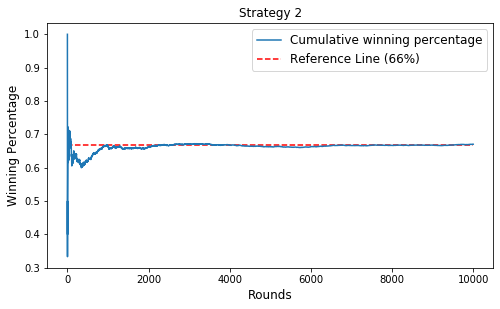

In [20]:
################################
# Strategy 2 - Door is changed #
################################

victories = [] # vector of victories

for i in range(n):

  prize_door = np.random.choice(doors,1) # door with the prize
  choice1 = np.random.choice(doors,1) # player's choice

  x_aux = np.setdiff1d(doors,[prize_door,choice1]) # auxiliar variable

  if len(x_aux) > 1:
    excluded_door = np.random.choice(x_aux,1)
  else:
    excluded_door = x_aux # exclude one door
  
  choice2 = np.setdiff1d(doors,[choice1,excluded_door]) # player changes door

  # if the choice 2 is equal to the the prize door, win [1]
  if prize_door == choice2:
   victories[n:n] = [1]
  # if the choice 2 is different from the the prize door, lose [0]
  else:
   victories[n:n] = [0]

# Compute results

rounds = np.array(range(1,n+1,1))
win_perc = np.cumsum(victories)/rounds 

data = pd.DataFrame({'rounds':rounds, 'win_perc':win_perc})

# Plot

plt.figure(figsize=(8,4.5))
plt.plot('rounds','win_perc', data=data, label='Cumulative winning percentage')
plt.hlines(y=2/3, xmin=0,xmax=n, colors='red', linestyles='dashed', 
           label='Reference Line (66%)')
plt.title('Strategy 2', fontsize = 12)
plt.ylabel('Winning Percentage', fontsize = 12)
plt.xlabel('Rounds',fontsize = 12)
plt.legend(loc='best', fontsize=12)
plt.show()